In [10]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [12]:
data = pd.read_csv('employee_survey.csv')     #show the data

In [14]:
data.describe()

,EmpID,Age,Experience,WLB,WorkEnv,PhysicalActivityHours,Workload,Stress,SleepHours,CommuteDistance,NumCompanies,TeamSize,NumReports,TrainingHoursPerYear,JobSatisfaction
count,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000
mean,1513.000000,35.741818,9.082645,3.061157,3.029091,2.029620,2.966612,1.736529,7.005983,13.473719,4.253554,16.516033,2.383140,37.301653,3.386777
std,873.386608,10.191833,7.073344,1.447001,1.415317,0.966014,1.401486,1.064242,1.002652,8.395249,3.382501,6.638419,3.058131,13.569772,1.260599
min,1.000000,22.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,4.000000,1.000000,0.000000,5.000000,0.000000,10.000000,1.000000
25%,757.000000,27.000000,3.000000,2.000000,2.000000,1.300000,2.000000,1.000000,6.300000,6.000000,1.000000,11.000000,0.000000,23.500000,3.000000
50%,1513.000000,34.000000,8.000000,3.000000,3.000000,2.000000,3.000000,1.000000,7.000000,13.000000,4.000000,16.000000,0.000000,40.000000,4.000000
75%,2269.000000,43.000000,14.000000,4.000000,4.000000,2.700000,4.000000,2.000000,7.700000,21.000000,7.000000,22.000000,5.000000,46.500000,4.000000
max,3025.000000,60.000000,29.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,29.000000,12.000000,30.000000,9.000000,64.500000,5.000000


In [8]:
data.describe(include='all')      #to include categorical variables as well

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,...,SleepHours,CommuteMode,CommuteDistance,NumCompanies,TeamSize,NumReports,EduLevel,haveOT,TrainingHoursPerYear,JobSatisfaction
count,3025.000000,3025,3025.000000,3025,3025,3025.000000,3025,3025,3025.000000,3025.000000,...,3025.000000,3025,3025.000000,3025.000000,3025.000000,3025.000000,3025,3025,3025.000000,3025.000000
unique,NaN,3,NaN,4,5,NaN,8,3,NaN,NaN,...,NaN,5,NaN,NaN,NaN,NaN,4,2,NaN,NaN
top,NaN,Male,NaN,Single,Senior,NaN,IT,Full-Time,NaN,NaN,...,NaN,Car,NaN,NaN,NaN,NaN,Bachelor,False,NaN,NaN
freq,NaN,1528,NaN,1437,1069,NaN,774,2077,NaN,NaN,...,NaN,1087,NaN,NaN,NaN,NaN,2300,2089,NaN,NaN
mean,1513.000000,NaN,35.741818,NaN,NaN,9.082645,NaN,NaN,3.061157,3.029091,...,7.005983,NaN,13.473719,4.253554,16.516033,2.383140,NaN,NaN,37.301653,3.386777
std,873.386608,NaN,10.191833,NaN,NaN,7.073344,NaN,NaN,1.447001,1.415317,...,1.002652,NaN,8.395249,3.382501,6.638419,3.058131,NaN,NaN,13.569772,1.260599
min,1.000000,NaN,22.000000,NaN,NaN,0.000000,NaN,NaN,1.000000,1.000000,...,4.000000,NaN,1.000000,0.000000,5.000000,0.000000,NaN,NaN,10.000000,1.000000
25%,757.000000,NaN,27.000000,NaN,NaN,3.000000,NaN,NaN,2.000000,2.000000,...,6.300000,NaN,6.000000,1.000000,11.000000,0.000000,NaN,NaN,23.500000,3.000000
50%,1513.000000,NaN,34.000000,NaN,NaN,8.000000,NaN,NaN,3.000000,3.000000,...,7.000000,NaN,13.000000,4.000000,16.000000,0.000000,NaN,NaN,40.000000,4.000000
75%,2269.000000,NaN,43.000000,NaN,NaN,14.000000,NaN,NaN,4.000000,4.000000,...,7.700000,NaN,21.000000,7.000000,22.000000,5.000000,NaN,NaN,46.500000,4.000000


In [16]:
# to chck for missing data
data.isnull()

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,...,SleepHours,CommuteMode,CommuteDistance,NumCompanies,TeamSize,NumReports,EduLevel,haveOT,TrainingHoursPerYear,JobSatisfaction
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3021,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3022,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3023,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
#True stands for missing value, while false stands for an available one. I don't see any true above....

In [20]:
#to check for null observations
data.isnull().sum()

EmpID                    0
Gender                   0
Age                      0
MaritalStatus            0
JobLevel                 0
Experience               0
Dept                     0
EmpType                  0
WLB                      0
WorkEnv                  0
PhysicalActivityHours    0
Workload                 0
Stress                   0
SleepHours               0
CommuteMode              0
CommuteDistance          0
NumCompanies             0
TeamSize                 0
NumReports               0
EduLevel                 0
haveOT                   0
TrainingHoursPerYear     0
JobSatisfaction          0
dtype: int64

In [22]:
#no missing values, all are 0.

Remove the employee ID because the value is not meaningful

In [26]:
# Remove a column named 'variable_name'
data = data.drop(columns=['EmpID'])



In [28]:
data.describe(include='all')  

,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,PhysicalActivityHours,...,SleepHours,CommuteMode,CommuteDistance,NumCompanies,TeamSize,NumReports,EduLevel,haveOT,TrainingHoursPerYear,JobSatisfaction
count,3025,3025.000000,3025,3025,3025.000000,3025,3025,3025.000000,3025.000000,3025.000000,...,3025.000000,3025,3025.000000,3025.000000,3025.000000,3025.000000,3025,3025,3025.000000,3025.000000
unique,3,NaN,4,5,NaN,8,3,NaN,NaN,NaN,...,NaN,5,NaN,NaN,NaN,NaN,4,2,NaN,NaN
top,Male,NaN,Single,Senior,NaN,IT,Full-Time,NaN,NaN,NaN,...,NaN,Car,NaN,NaN,NaN,NaN,Bachelor,False,NaN,NaN
freq,1528,NaN,1437,1069,NaN,774,2077,NaN,NaN,NaN,...,NaN,1087,NaN,NaN,NaN,NaN,2300,2089,NaN,NaN
mean,NaN,35.741818,NaN,NaN,9.082645,NaN,NaN,3.061157,3.029091,2.029620,...,7.005983,NaN,13.473719,4.253554,16.516033,2.383140,NaN,NaN,37.301653,3.386777
std,NaN,10.191833,NaN,NaN,7.073344,NaN,NaN,1.447001,1.415317,0.966014,...,1.002652,NaN,8.395249,3.382501,6.638419,3.058131,NaN,NaN,13.569772,1.260599
min,NaN,22.000000,NaN,NaN,0.000000,NaN,NaN,1.000000,1.000000,0.000000,...,4.000000,NaN,1.000000,0.000000,5.000000,0.000000,NaN,NaN,10.000000,1.000000
25%,NaN,27.000000,NaN,NaN,3.000000,NaN,NaN,2.000000,2.000000,1.300000,...,6.300000,NaN,6.000000,1.000000,11.000000,0.000000,NaN,NaN,23.500000,3.000000
50%,NaN,34.000000,NaN,NaN,8.000000,NaN,NaN,3.000000,3.000000,2.000000,...,7.000000,NaN,13.000000,4.000000,16.000000,0.000000,NaN,NaN,40.000000,4.000000
75%,NaN,43.000000,NaN,NaN,14.000000,NaN,NaN,4.000000,4.000000,2.700000,...,7.700000,NaN,21.000000,7.000000,22.000000,5.000000,NaN,NaN,46.500000,4.000000


Exloring the pdfs

This is the code that checks the distribution (in brackets you put the variable name): sns.distplot(data['CommuteDistance'])
Some of the distributions do not look normal, but I am worried about removing data (using the below code), just because I do not have a good reason for doing so. To solve this, I will turn som of the continuous variables into categorical ones and leave the rest as they are.
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

In [49]:
#Now check the assumptions for the continuous variables.

Text(0.5, 1.0, 'JobSatisfaction and PhysicalActivityhours')

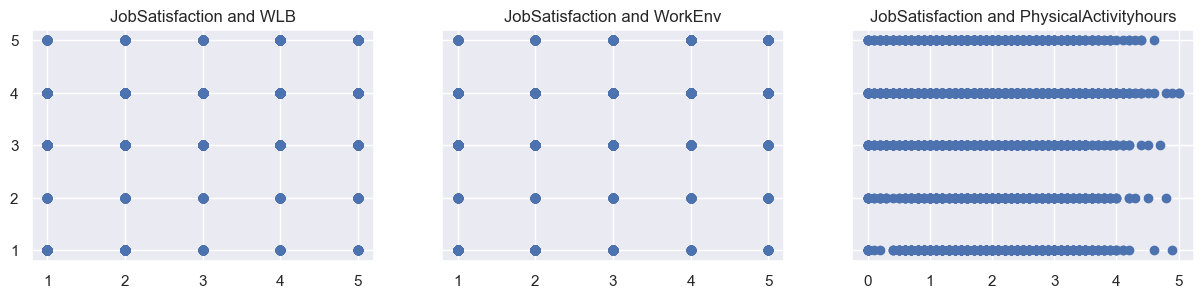

In [57]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True, figsize=(15,3))
ax1.scatter(data['WLB'],data['JobSatisfaction'])
ax1.set_title('JobSatisfaction and WLB')
ax2.scatter(data['WorkEnv'],data['JobSatisfaction'])
ax2.set_title('JobSatisfaction and WorkEnv')
ax3.scatter(data['PhysicalActivityHours'],data['JobSatisfaction'])
ax3.set_title('JobSatisfaction and PhysicalActivityhours')




These relationships are not linear....

Text(0.5, 1.0, 'JobSatisfaction and NumCompanies')

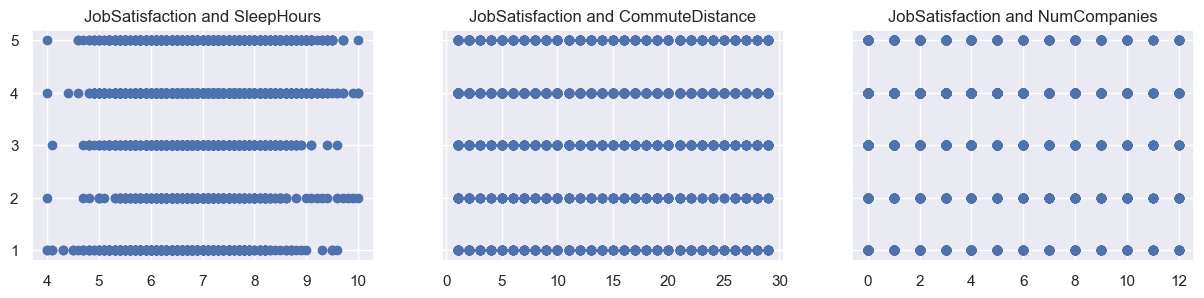

In [62]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True, figsize=(15,3))
ax1.scatter(data['SleepHours'],data['JobSatisfaction'])
ax1.set_title('JobSatisfaction and SleepHours')
ax2.scatter(data['CommuteDistance'],data['JobSatisfaction'])
ax2.set_title('JobSatisfaction and CommuteDistance')
ax3.scatter(data['NumCompanies'],data['JobSatisfaction'])
ax3.set_title('JobSatisfaction and NumCompanies')



The relationships do not seem to be linear....maybe I should go back to basics and see the relationships between the inputs and target to see if it iseven worthwhile to do a regression....

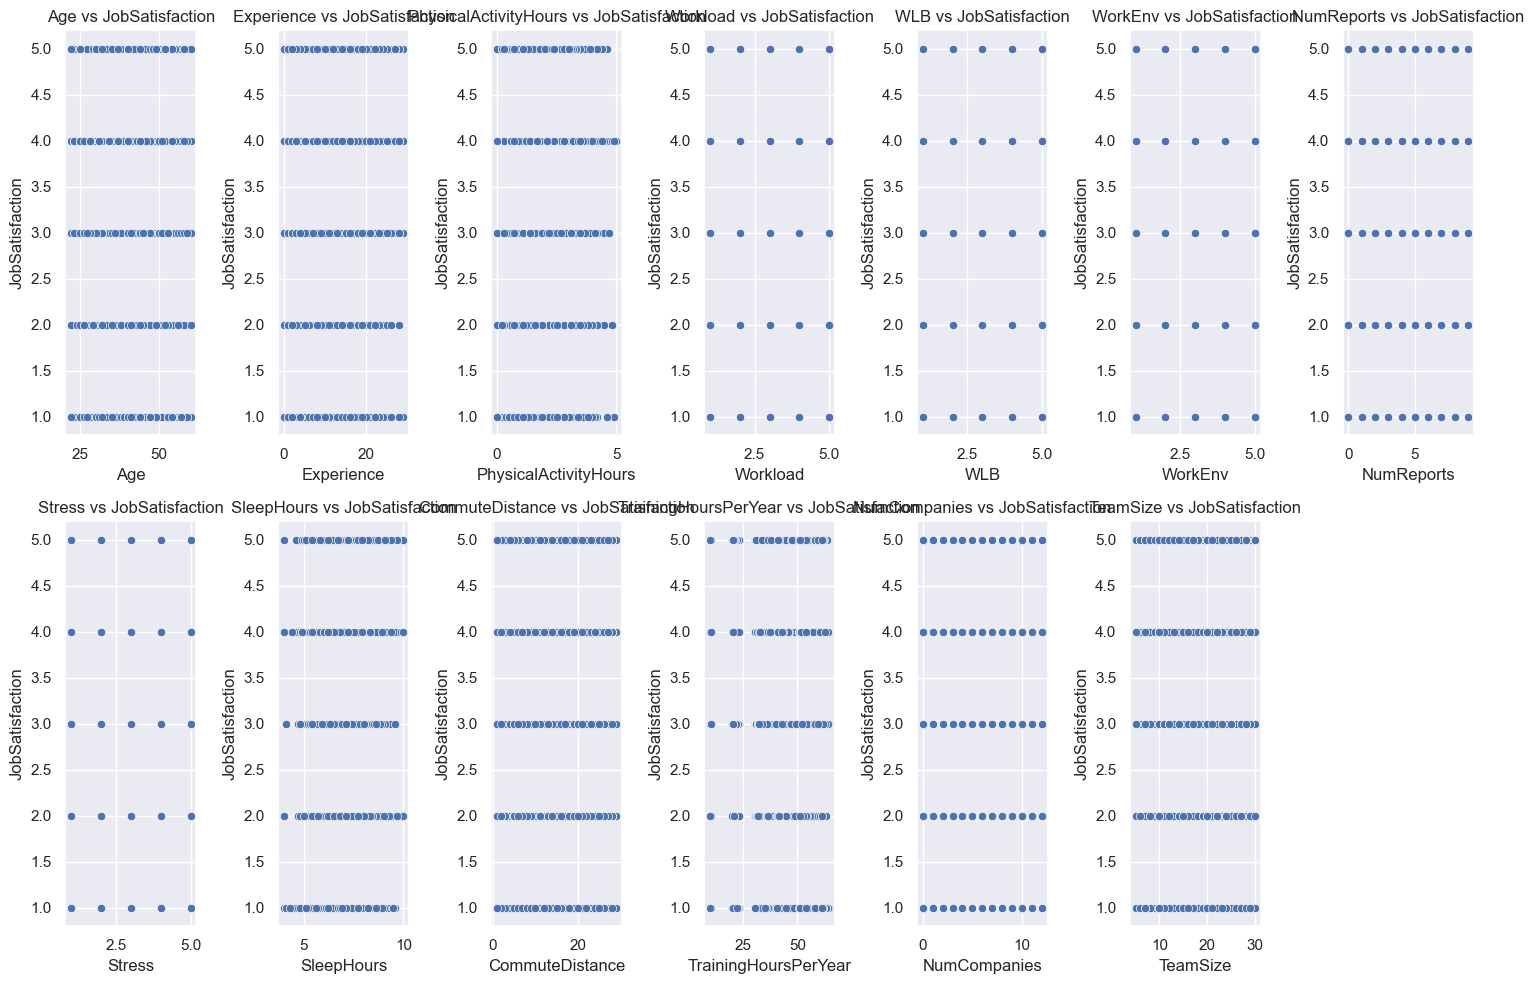

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of continuous variables
continuous_vars = [
    'Age', 'Experience', 'PhysicalActivityHours', 'Workload','WLB','WorkEnv','NumReports',
    'Stress', 'SleepHours', 'CommuteDistance', 'TrainingHoursPerYear','NumCompanies','TeamSize'
]

# Setting up the plot grid
num_vars = len(continuous_vars)
fig, axes = plt.subplots(nrows=2, ncols=(num_vars + 1) // 2, figsize=(15, 10))
axes = axes.flatten()

# Scatterplots to visualize linearity
for i, var in enumerate(continuous_vars):
    sns.scatterplot(x=data[var], y=data['JobSatisfaction'], ax=axes[i])
    axes[i].set_title(f'{var} vs JobSatisfaction')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('JobSatisfaction')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [99]:
# Calculate correlation coefficients between continuous variables and JobSatisfaction
correlations = data[continuous_vars + ['JobSatisfaction']].corr()

# Extract correlations with JobSatisfaction and sort them
job_satisfaction_corr = correlations['JobSatisfaction'].drop('JobSatisfaction').sort_values(ascending=False)
job_satisfaction_corr


WLB                      0.259687
WorkEnv                  0.248730
SleepHours               0.179872
TeamSize                 0.002341
CommuteDistance          0.000773
NumCompanies            -0.003929
TrainingHoursPerYear    -0.005605
Age                     -0.006433
PhysicalActivityHours   -0.011149
Experience              -0.011893
NumReports              -0.020611
Stress                  -0.214383
Workload                -0.253426
Name: JobSatisfaction, dtype: float64

From the above, we can see that only WLB, WorkEnv, Sleephours, Stress and Workload have the highest correlations. Even though the graphs do not show the linearity, the correlation coefficient shows a correlation.

#however, these variables only explain 0.067%,0.061,0.032%, 0.045, and 0.064% of the variance in JobSatisfaction.
#this is very little variance explained in JS(0.269). We would have to go back to the drawing board and collect more data using #a different variables.

I will do the regression analysis anyway, using these variables. But first, I need to check multicolinearity.

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor     #VIF
variables = data[['WLB','WorkEnv','SleepHours','Stress','Workload']]
vif = pd.DataFrame()

In [103]:
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"]= variables.columns

In [105]:
vif

,VIF,features
0,5.095665,WLB
1,5.144857,WorkEnv
2,12.985119,SleepHours
3,3.531153,Stress
4,5.151800,Workload


In [84]:
#The only VIF that is above 10 is Sleephours. I will remove that one and leave the rest.

Now, I will drop the continuous variables that had the lowest correlations with JobSatisfaction and the one with the the VIF above 10 ie. SleepHours

In [125]:
# Remove a column named 'variable_name'
copy_data = data.drop(columns=['CommuteDistance','NumCompanies','TrainingHoursPerYear','TeamSize','NumReports','Age','PhysicalActivityHours','Experience','SleepHours'])
copy_data

,Gender,MaritalStatus,JobLevel,Dept,EmpType,WLB,WorkEnv,Workload,Stress,CommuteMode,EduLevel,haveOT,JobSatisfaction
0,Male,Married,Mid,IT,Full-Time,1,1,2,1,Car,Bachelor,True,5
1,Female,Married,Mid,Finance,Full-Time,1,1,2,2,Car,Bachelor,False,5
2,Female,Single,Intern/Fresher,Marketing,Full-Time,2,4,5,4,Motorbike,Bachelor,True,5
3,Female,Married,Junior,IT,Contract,2,2,3,1,Public Transport,Bachelor,True,5
4,Other,Single,Junior,Sales,Part-Time,3,1,2,1,Car,Bachelor,False,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,Male,Married,Lead,Marketing,Part-Time,1,3,4,3,Public Transport,Master,False,1
3021,Female,Married,Lead,IT,Contract,3,1,2,1,Car,Master,True,1
3022,Male,Married,Lead,IT,Full-Time,1,1,1,1,Public Transport,Master,True,1
3023,Female,Married,Lead,IT,Full-Time,1,5,3,3,Public Transport,Master,True,1


In [93]:
#Now I will create dummy variables with the categorical inputs.

In [226]:
data_with_dummies = pd.get_dummies(copy_data,drop_first=True)

In [262]:
data_with_dummies.head()

,WLB,WorkEnv,Workload,Stress,haveOT,JobSatisfaction,Gender_Male,Gender_Other,MaritalStatus_Married,MaritalStatus_Single,...,Dept_Sales,EmpType_Full-Time,EmpType_Part-Time,CommuteMode_Car,CommuteMode_Motorbike,CommuteMode_Public Transport,CommuteMode_Walk,EduLevel_High School,EduLevel_Master,EduLevel_PhD
0,1,1,2,1,True,5,True,False,True,False,...,False,True,False,True,False,False,False,False,False,False
1,1,1,2,2,False,5,False,False,True,False,...,False,True,False,True,False,False,False,False,False,False
2,2,4,5,4,True,5,False,False,False,True,...,False,True,False,False,True,False,False,False,False,False
3,2,2,3,1,True,5,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,3,1,2,1,False,5,False,True,False,True,...,True,False,True,True,False,False,False,False,False,False


In [264]:
data_with_dummies.columns.values

array(['WLB', 'WorkEnv', 'Workload', 'Stress', 'haveOT',
       'JobSatisfaction', 'Gender_Male', 'Gender_Other',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Widowed', 'JobLevel_Junior', 'JobLevel_Lead',
       'JobLevel_Mid', 'JobLevel_Senior', 'Dept_Finance', 'Dept_HR',
       'Dept_IT', 'Dept_Legal', 'Dept_Marketing', 'Dept_Operations',
       'Dept_Sales', 'EmpType_Full-Time', 'EmpType_Part-Time',
       'CommuteMode_Car', 'CommuteMode_Motorbike',
       'CommuteMode_Public Transport', 'CommuteMode_Walk',
       'EduLevel_High School', 'EduLevel_Master', 'EduLevel_PhD'],
      dtype=object)

In [266]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [268]:
scaler.get_params()

{'copy': True, 'with_mean': True, 'with_std': True}

In [270]:
inputs_scaled = scaler.transform(inputs)

It is not usually advised to standardise dummy variables but in ML, it is done. This is because scaling has no effect on the predictive power of the dummy variables.

Now we will split out data into training and testing.

In [272]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(inputs_scaled,targets,test_size=0.2,random_state=365)    
             #random allows us to fiddle with the data later                                                                                                                                                

In [173]:
#Create the regression

In [274]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [195]:
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [197]:
y_hat = reg.predict(x_train)

/var/folders/0m/9_624w552gv2pjzzlfcjvz5r0000gn/T/ipykernel_73140/532823660.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_hat)


Text(0.5, 1.0, 'Residuals PDF')

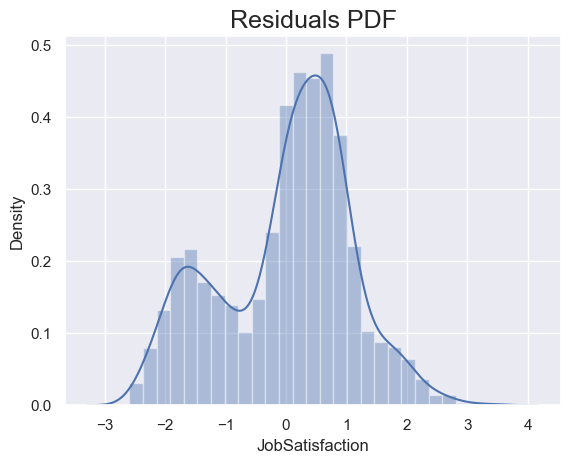

In [276]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF",size=18)     #TO CHECK THE RESIDUALS....


I need to check the assumption that has to do with residuals...
In anycase, the mean is 0 and SD is 1, which is good.

In [278]:
reg.score(x_train,y_train)       #Calculate r squared

0.24520964937693068

In [280]:
reg.intercept_                   #yintercept or bias

3.3763125383049513

In [282]:
reg.coef_

array([ 0.00351511, -0.00241348, -0.02914173, -0.03547418,  0.03416004,
        0.32750881,  0.32532165, -0.32006622, -0.26672355,  0.0004487 ,
       -0.04447727])

In [212]:
#Since these are hard to read this way, it is better to creat a table

In [286]:
reg_summary = pd.DataFrame(inputs.columns.values,columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Gender,0.003515
1,MaritalStatus,-0.002413
2,JobLevel,-0.029142
3,Dept,-0.035474
4,EmpType,0.034160
5,WLB,0.327509
6,WorkEnv,0.325322
7,Workload,-0.320066
8,Stress,-0.266724
9,CommuteMode,0.000449


How to interpret the dummy variables- in my online class example, the output also showed the dummy variables as split variables....but maybe the dummies do not explain enough variance in Job satisfaction and that is why the dummies are not split...

It is also possible to create dummies this way: new_data = copy_data.copy()
new_data['Gender'] = new_data['Gender'].map({'Other':2,'Female':1,'Male':0})
new_data['MaritalStatus'] = new_data['MaritalStatus'].map({'Divorced':4,'Widowed':3,'Married':1,'Single':0})
new_data['JobLevel'] = new_data['JobLevel'].map({'Lead':4,'Senior':3,'Mid':2,'Junior':1,'Intern/Fresher':0})
new_data['Dept'] = new_data['Dept'].map({'IT':7,'HR':6,'Finance':5,'Marketing':4,'Sales':3,'Legal':2,'Operations':1,'Customer Service':0})
new_data['EmpType'] = new_data['EmpType'].map({'Full-Time':2,'Part-Time':1,'Contract':0})
new_data['CommuteMode'] = new_data['CommuteMode'].map({'Car':4,'Public Transport':3,'Bike':2,'Walk':1,'Motorbike':0})
new_data['EduLevel'] = new_data['EduLevel'].map({'High School':3,'Bachelor':2,'Master':1,'PhD':0})
new_data['haveOT'] = new_data['haveOT'].map({'True':1,'False':0})

iinstead of : 
data_with_dummies = pd.get_dummies(copy_data,drop_first=True)
data_with_dummies.head()


In any case, these are the biggest predictors of work satisfaction
WLB	      0.327509
WorkEnv	  0.325322
Workload	-0.320066
Stress	 -0.266724


In [290]:
#test the model

In [292]:
y_hat_test = reg.predict(x_test)

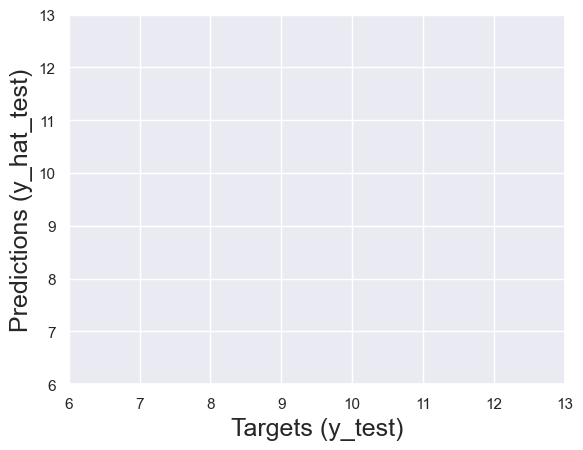

In [294]:
plt.scatter(y_test,y_hat_test)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

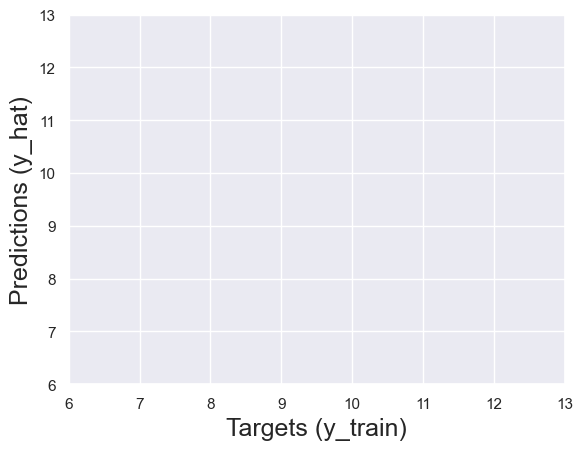

In [296]:
plt.scatter(y_train,y_hat,alpha=0.2)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

I am not sure why the tables ar empty

To find out how good these predictiona are, do the following:

In [301]:
df_pf = pd.DataFrame(y_hat_test,columns=['Predictions'])
df_pf.head()

,Predictions
0,3.155853
1,3.552253
2,3.385870
3,3.721863
4,3.543004


In [303]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    3
1    4
2    5
3    5
4    5
Name: JobSatisfaction, dtype: int64

In [305]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Predictions,Target
0,3.155853,20.085537
1,3.552253,54.598150
2,3.385870,148.413159
3,3.721863,148.413159
4,3.543004,148.413159
...,...,...
600,3.323172,20.085537
601,2.889021,20.085537
602,2.741507,20.085537
603,4.751126,54.598150


2.Endogeneity- IV and error term in dv correlating. These will be discussed after the regression has been created Now we can examine the residuals

In [308]:
df_pf['Residual']= df_pf['Target']-df_pf['Predictions']

In [310]:
df_pf['Difference%']= np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Predictions,Target,Residual,Difference%
0,3.155853,20.085537,16.929684,84.287935
1,3.552253,54.598150,51.045897,93.493822
2,3.385870,148.413159,145.027289,97.718619
3,3.721863,148.413159,144.691296,97.492228
4,3.543004,148.413159,144.870155,97.612743
...,...,...,...,...
600,3.323172,20.085537,16.762365,83.454902
601,2.889021,20.085537,17.196516,85.616412
602,2.741507,20.085537,17.344030,86.350838
603,4.751126,54.598150,49.847024,91.298009


In [312]:
df_pf.describe()

,Predictions,Target,Residual,Difference%
count,605.000000,605.000000,605.000000,605.000000
mean,3.392306,55.068172,51.675866,78.575081
std,0.642748,49.211549,48.991584,28.580098
min,1.297220,2.718282,-0.812397,0.443317
25%,2.938663,20.085537,16.326064,81.282685
50%,3.385870,54.598150,50.639066,92.752815
75%,3.847782,54.598150,51.467461,94.265942
max,5.050233,148.413159,146.670663,98.825916


The minimum difference between prediction and target is .44%
The max is 98%
If we look at the percentiles, the difference between prediction and target are quite high....

In [317]:
df_pf.sort_values(by=['Difference%'])

,Predictions,Target,Residual,Difference%
159,2.730332,2.718282,-0.012051,0.443317
34,2.745106,2.718282,-0.026824,0.986813
357,2.681786,2.718282,0.036496,1.342607
45,2.756874,2.718282,-0.038592,1.419723
490,2.765030,2.718282,-0.046748,1.719770
...,...,...,...,...
489,2.601793,148.413159,145.811366,98.246925
13,2.488875,148.413159,145.924284,98.323009
116,2.421213,148.413159,145.991946,98.368599
131,1.863807,148.413159,146.549352,98.744177


In [319]:
#to show all rows

In [323]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format',lambda x: '%.2f' %x)
df_pf.sort_values(by=['Difference%'])

,Predictions,Target,Residual,Difference%
159,2.73,2.72,-0.01,0.44
34,2.75,2.72,-0.03,0.99
357,2.68,2.72,0.04,1.34
45,2.76,2.72,-0.04,1.42
490,2.77,2.72,-0.05,1.72
226,2.78,2.72,-0.06,2.10
67,2.78,2.72,-0.06,2.20
241,2.79,2.72,-0.07,2.55
544,2.65,2.72,0.07,2.63
117,2.64,2.72,0.07,2.70


going to the bottom, you can see that the differences between predicted and targeted values is very high and the residuals for thse are negative , meaning their predictions are higher than the target. To improve this model, try using different set of variables, remove outliers, use different kinds of transformations.

I would collect more data because the variables in this model explain less than 25% of the variance in Job satisfaction.... we are missing data that explains more variance. or rerun the model with only the most important predictors....